In [42]:
import sys
sys.path.append('../src')
from irish_buoy_data import IrishBuoyData

# Test the IrishBuoyData class
buoy = IrishBuoyData(station_id="M6")

# Fetch data (default 30 days)
data = buoy.fetch_data(days_back=5000)


# Print basic info
print("Full Dataset:")
print(data.head())
print(f"\nShape: {data.shape}")
print(f"\nColumns: {data.columns.tolist()}")

# Test baseline subset (meteorological only)
baseline = buoy.get_baseline_subset(data)
print("\n--- Baseline Subset (Met features only) ---")
print(baseline.head())
print(f"Columns: {baseline.columns.tolist()}")

# Test wave-enhanced subset
wave_enhanced = buoy.get_wave_enhanced_subset(data)
print("\n--- Wave-Enhanced Subset ---")
print(wave_enhanced.head())
print(f"Columns: {wave_enhanced.columns.tolist()}")

# Check for missing values
print(f"\n--- Data Quality ---")
print(f"Total rows: {len(data)}")
print(f"Date range: {data.index.min()} to {data.index.max()}")
print(f"\nMissing values per column:")
print(data.isnull().sum())

Full Dataset:
                          station_id  WindSpeed (knots)  \
time (UTC)                                                
2019-06-13 09:00:00+00:00         M6             16.166   
2019-06-13 21:00:00+00:00         M6             15.939   
2019-06-14 04:00:00+00:00         M6             11.840   
2019-06-15 00:00:00+00:00         M6             10.816   
2019-06-15 10:00:00+00:00         M6             11.499   

                           AirTemperature (degrees_C)  \
time (UTC)                                              
2019-06-13 09:00:00+00:00                      11.484   
2019-06-13 21:00:00+00:00                      11.729   
2019-06-14 04:00:00+00:00                      11.338   
2019-06-15 00:00:00+00:00                      10.264   
2019-06-15 10:00:00+00:00                      11.533   

                           AtmosphericPressure (millibars)  \
time (UTC)                                                   
2019-06-13 09:00:00+00:00                       

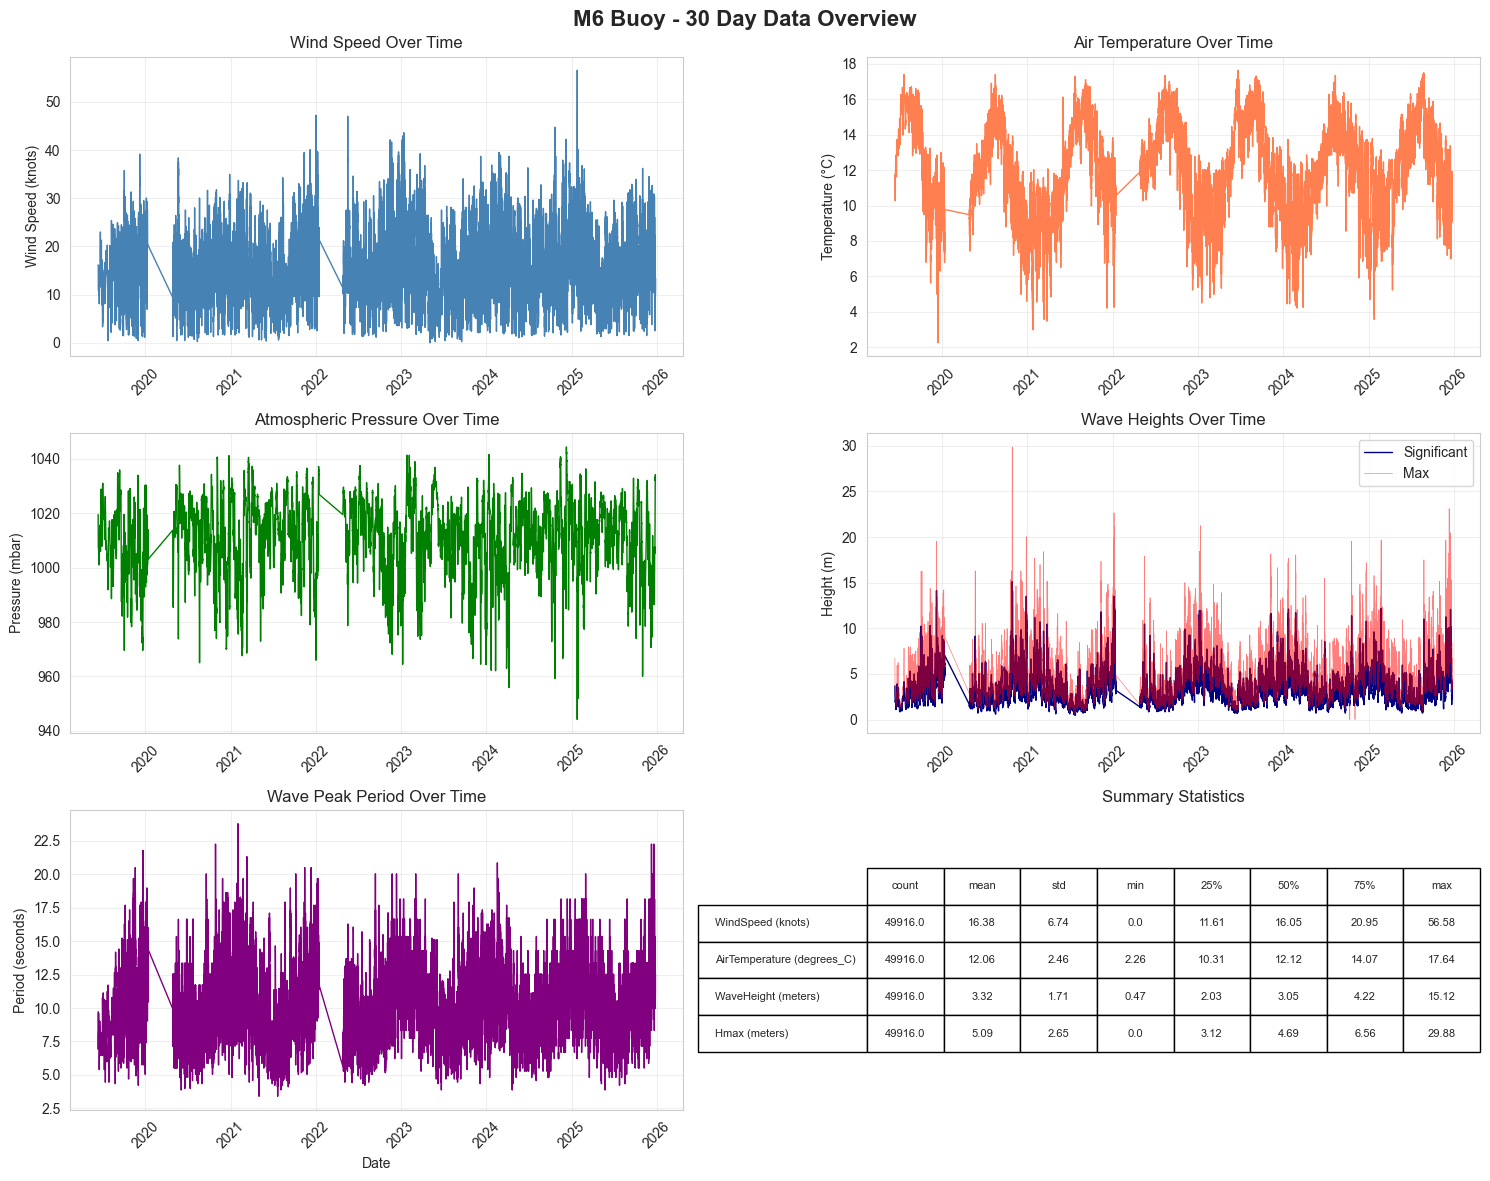


=== Key Insights ===
Wind Speed: 0.0 - 56.6 knots
Temperature: 2.3 - 17.6 °C
Wave Height: 0.5 - 15.1 m
Max Wave: 29.9 m (storm event)


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (25, 15)

# Create subplots for all variables
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('M6 Buoy - 30 Day Data Overview', fontsize=16, fontweight='bold')

# Plot 1: Wind Speed
axes[0, 0].plot(data.index, data['WindSpeed (knots)'], color='steelblue', linewidth=1)
axes[0, 0].set_title('Wind Speed Over Time')
axes[0, 0].set_ylabel('Wind Speed (knots)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Air Temperature
axes[0, 1].plot(data.index, data['AirTemperature (degrees_C)'], color='coral', linewidth=1)
axes[0, 1].set_title('Air Temperature Over Time')
axes[0, 1].set_ylabel('Temperature (°C)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Atmospheric Pressure
axes[1, 0].plot(data.index, data['AtmosphericPressure (millibars)'], color='green', linewidth=1)
axes[1, 0].set_title('Atmospheric Pressure Over Time')
axes[1, 0].set_ylabel('Pressure (mbar)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Wave Height
axes[1, 1].plot(data.index, data['WaveHeight (meters)'], color='navy', linewidth=1, label='Significant')
axes[1, 1].plot(data.index, data['Hmax (meters)'], color='red', linewidth=0.5, alpha=0.5, label='Max')
axes[1, 1].set_title('Wave Heights Over Time')
axes[1, 1].set_ylabel('Height (m)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot 5: Peak Period
axes[2, 0].plot(data.index, data['Tp (seconds)'], color='purple', linewidth=1)
axes[2, 0].set_title('Wave Peak Period Over Time')
axes[2, 0].set_ylabel('Period (seconds)')
axes[2, 0].set_xlabel('Date')
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].tick_params(axis='x', rotation=45)

# Plot 6: Summary Statistics
summary_stats = data[['WindSpeed (knots)', 'AirTemperature (degrees_C)', 
                      'WaveHeight (meters)', 'Hmax (meters)']].describe()
axes[2, 1].axis('off')
table_data = summary_stats.round(2).T
table = axes[2, 1].table(cellText=table_data.values,
                         rowLabels=table_data.index,
                         colLabels=table_data.columns,
                         cellLoc='center',
                         loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 2)
axes[2, 1].set_title('Summary Statistics')

plt.tight_layout()
plt.show()

# Print some insights
print("\n=== Key Insights ===")
print(f"Wind Speed: {data['WindSpeed (knots)'].min():.1f} - {data['WindSpeed (knots)'].max():.1f} knots")
print(f"Temperature: {data['AirTemperature (degrees_C)'].min():.1f} - {data['AirTemperature (degrees_C)'].max():.1f} °C")
print(f"Wave Height: {data['WaveHeight (meters)'].min():.1f} - {data['WaveHeight (meters)'].max():.1f} m")
print(f"Max Wave: {data['Hmax (meters)'].max():.1f} m (storm event)")

In [44]:
import sys
sys.path.append('../src')
from irish_buoy_data import IrishBuoyData

# Try fetching a very large time window
buoy = IrishBuoyData(station_id="M6")

# Test with different time ranges
for days in [365, 730, 1825, 3650]:  # 1, 2, 5, 10 years
    try:
        data = buoy.fetch_data(days_back=days)
        print(f"{days} days ({days//365} years): {len(data)} rows")
        print(f"  Date range: {data.index.min()} to {data.index.max()}")
    except Exception as e:
        print(f"{days} days: Error - {e}")

# Or check the earliest available data
print("\n--- Checking maximum available history ---")
max_data = buoy.fetch_data(days_back=5000)  # ~13 years
print(f"Total rows: {len(max_data)}")
print(f"Earliest: {max_data.index.min()}")
print(f"Latest: {max_data.index.max()}")
print(f"Total span: {(max_data.index.max() - max_data.index.min()).days} days")

365 days (1 years): 8462 rows
  Date range: 2024-12-24 17:00:00+00:00 to 2025-12-24 16:00:00+00:00
730 days (2 years): 16964 rows
  Date range: 2023-12-25 17:00:00+00:00 to 2025-12-24 16:00:00+00:00
1825 days (5 years): 40558 rows
  Date range: 2020-12-25 17:00:00+00:00 to 2025-12-24 16:00:00+00:00
3650 days (10 years): 49916 rows
  Date range: 2019-06-13 09:00:00+00:00 to 2025-12-24 16:00:00+00:00

--- Checking maximum available history ---
Total rows: 49916
Earliest: 2019-06-13 09:00:00+00:00
Latest: 2025-12-24 16:00:00+00:00
Total span: 2386 days
